<ipython-input-1-b1885f28b931>:54: RuntimeWarning: invalid value encountered in true_divide
  Phi_inverse /= np.sum(Phi_inverse, axis=0)  # Normalisasi


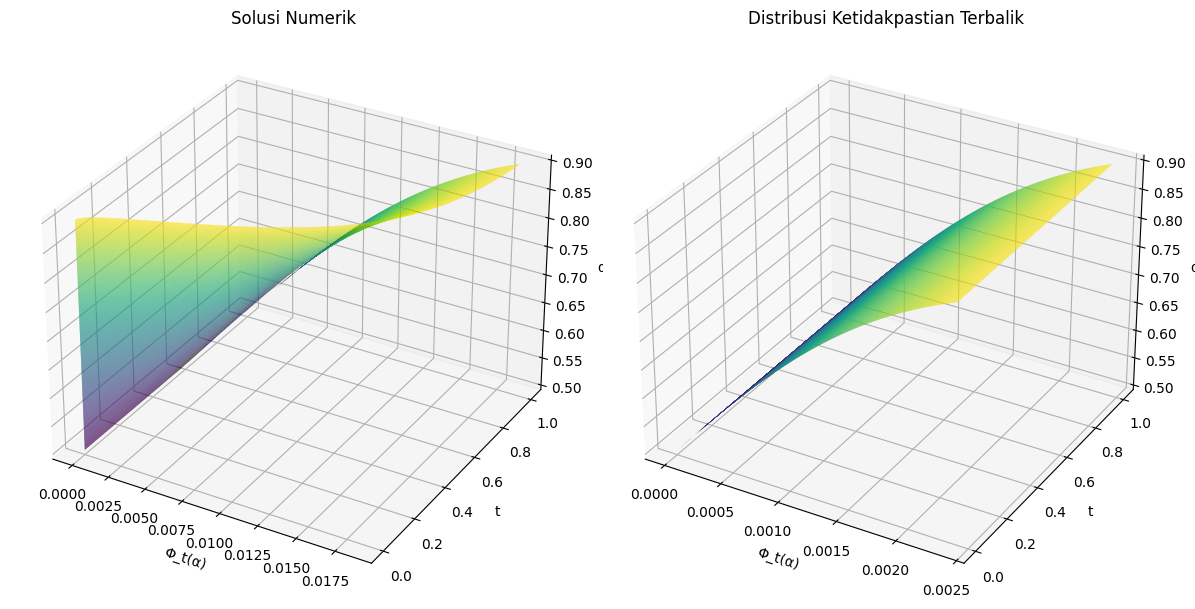

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def dXdt(t, X, alpha):
    return X[1], -20*X[1] - 64*X[0] + alpha

def runge_kutta(t0, X0, alpha, h, n):
    t_values = [t0]
    X_values = [X0]

    for _ in range(n):
        t = t_values[-1]
        X = X_values[-1]

        k1 = h * np.array(dXdt(t, X, alpha))
        k2 = h * np.array(dXdt(t + h/2, X + k1/2, alpha))
        k3 = h * np.array(dXdt(t + h/2, X + k2/2, alpha))
        k4 = h * np.array(dXdt(t + h, X + k3, alpha))

        t_values.append(t + h)
        X_values.append(X + (k1 + 2*k2 + 2*k3 + k4) / 6)

    return t_values, X_values

# Parameter
T = [0, 1]
alpha = np.linspace(0.5, 0.9, 1000)
n = 1000
h = (T[1] - T[0]) / n

# Inisialisasi solusi numerik
numerical_solution = np.zeros((n+1, len(alpha)))

# Solusi numerik
for i in range(len(alpha)):
    t_values, X_values = runge_kutta(T[0], [0, 0], alpha[i], h, n)
    numerical_solution[:, i] = np.array(X_values)[:, 0]

# Plot grafik 3D Solusi Numerik
T, Alpha = np.meshgrid(np.linspace(T[0], T[1], n+1), alpha)
Phi_numerical = (3/16 - 1/4*np.exp(-4*T) + 1/16*np.exp(-16*T)) * (np.sqrt(3)/(12*np.pi)) * np.log(Alpha/(1-Alpha))

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(Phi_numerical, T, Alpha, rstride=1, cstride=1, cmap='viridis')
ax1.set_xlabel('Φ_t(α)')
ax1.set_ylabel('t')
ax1.set_zlabel('α')
ax1.set_title('Solusi Numerik')

# Distribusi Ketidakpastian Terbalik Solusi Numerik
Phi_inverse = (3/16 - 1/4*np.exp(-4*T) + 1/16*np.exp(-16*T)) * (np.sqrt(3)/(12*np.pi)) * np.log(Alpha/(1-Alpha))
Phi_inverse /= np.sum(Phi_inverse, axis=0)  # Normalisasi

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(Phi_inverse, T, Alpha, rstride=1, cstride=1, cmap='viridis')
ax2.set_xlabel('Φ_t(α)')
ax2.set_ylabel('t')
ax2.set_zlabel('α')
ax2.set_title('Distribusi Ketidakpastian Terbalik')

plt.tight_layout()
plt.show()
